# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


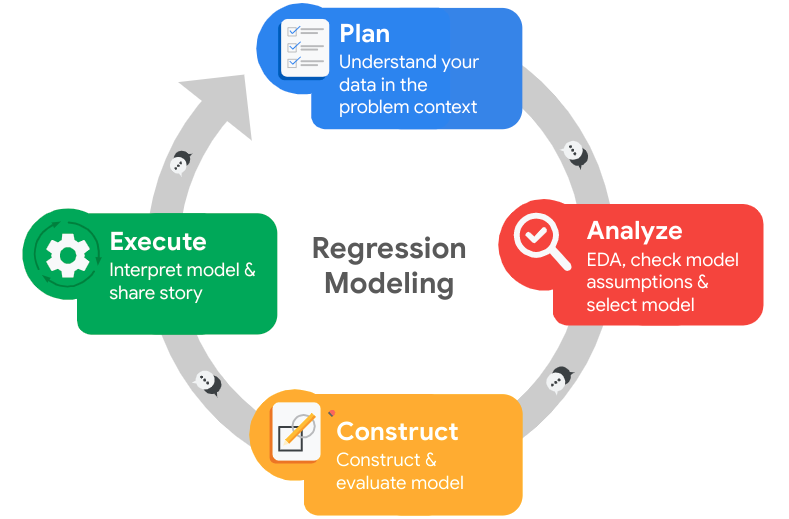

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders for this project is HR.
2. I am trying to understand what makes an employee leave this company, since there is a big amount of employee turnout recently.
3. Most of the columns are numeric datatypes(int/float), except for 'Department' and 'salary' which I will transform afterwards to numeric values using OneHotEncoding or pd.get_dummies() function later on for the logistic regression model.
4. Using previous course material and my own knowledge.
5. The ethical considerations in this stage is to ensure employee data privacy and confidentiality while actively addressing and mitigating any biases in the analysis to prevent unfair impact on specific groups (that part could be achieved by asking how was the data collected for this project).

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [120]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [121]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [122]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [123]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [124]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [126]:
# Rename columns as needed
df0.columns = [col.lower() for col in df0.columns]
df0 = df0.rename(columns={'time_spend_company':'tenure','average_montly_hours':'average_monthly_hours'})
# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [127]:
# Check for missing values
df0.isna().any().sum()

0

### Check duplicates

Check for any duplicate entries in the data.

In [128]:
# Check for duplicates
df0.duplicated().sum()


3008

In [129]:
# Inspect some rows containing duplicates as needed
#duplicated_values = [df0[col].duplicated().sum() for col in df0.columns]
#duplicated_values
duplicates = df0[df0.duplicated()]
duplicates.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [130]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')



# Display first few rows of new dataframe as needed
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check outliers

Check for outliers in the data.

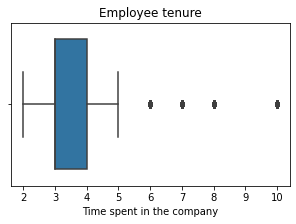

In [131]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(5,3))
ax = sns.boxplot(data=df,x=df['tenure'])
ax.set_xlabel("Time spent in the company")
ax.set_title("Employee tenure")
plt.show()


In [132]:
# Determine the number of rows containing outliers
# Computing the 25th and the 75th percentile value in `tenure`
percentile25 = df['tenure'].quantile(0.25)
percentile75 = df['tenure'].quantile(0.75)
# Computing the interquantile range in the 'tenure' column 
iqr = percentile75-percentile25
# Comoputing the upper and lower limit of the 'tenure' column
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)
tenure_outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]
print("Number of rows in the data containing outliers in `tenure`:", len(tenure_outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [133]:
# Get numbers of people who left vs. stayed
df['left'].value_counts()
# Get percentages of people who left vs. stayed
df['left'].value_counts(normalize=True)*100


0    83.39588
1    16.60412
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

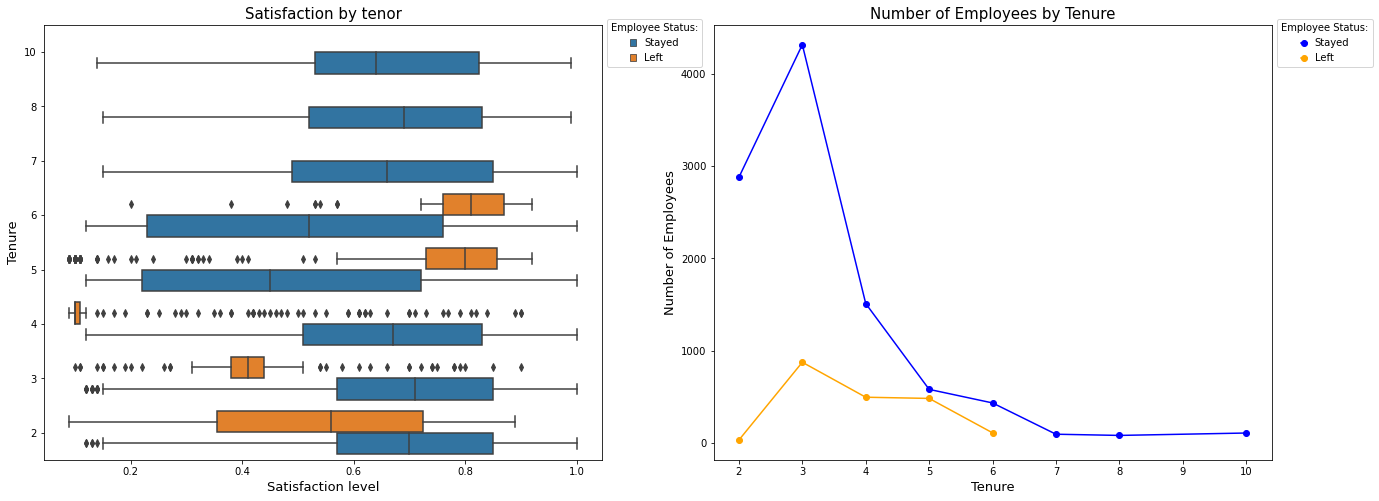

In [134]:
# Create a plot as needed
fig, ax = plt.subplots(1,2, figsize = (22,8))
sns.boxplot(data=df,x='satisfaction_level',y='tenure',hue='left',orient='h',dodge=True, ax=ax[0])
ax[0].set_ylabel("Tenure",fontsize='13')
ax[0].set_xlabel("Satisfaction level",fontsize='13')
ax[0].set_title("Satisfaction by tenor",fontsize='15')
ax[0].invert_yaxis()
handles, labels = ax[0].get_legend_handles_labels()  # Get existing legend handles and labels
ax[0].legend(title='Employee Status:',handles=handles, labels=["Stayed", "Left"], loc='upper left', handlelength=0.6,bbox_to_anchor=(1,1.025))



# Filter data for employees who left and stayed
left_df = df[df['left'] == 1]
stayed_df = df[df['left'] == 0]

# Aggregate the data: Count the number of employees who left and stayed by tenure
left_counts = left_df['tenure'].value_counts().sort_index()
stayed_counts = stayed_df['tenure'].value_counts().sort_index()

# Create a line plot on the second subplot (ax[1])
ax[1].plot(left_counts.index, left_counts.values, marker='o', linestyle='-',color='orange', label='Left')
ax[1].plot(stayed_counts.index, stayed_counts.values, marker='o', linestyle='-',color='blue', label='Stayed')

# Set title, labels, and legend for the second subplot
ax[1].set_title('Number of Employees by Tenure', fontsize='15')
ax[1].set_xlabel("Tenure",fontsize='13')
ax[1].set_ylabel("Number of Employees",fontsize='13')
ax[1].legend(title='Employee Status:', loc='upper left', handlelength=0.6,bbox_to_anchor=(1,1.025))
# Invert the order of legend
handles, labels = ax[1].get_legend_handles_labels()
# Create a new order: 'Stayed' first, 'Left' second
new_order = [handles[1], handles[0]]
new_labels = [labels[1], labels[0]]
ax[1].legend(handles=new_order, labels=new_labels, title='Employee Status:', loc='upper right', handlelength=0.6, bbox_to_anchor=(1.19,1.025))

# Display the plots
plt.show()


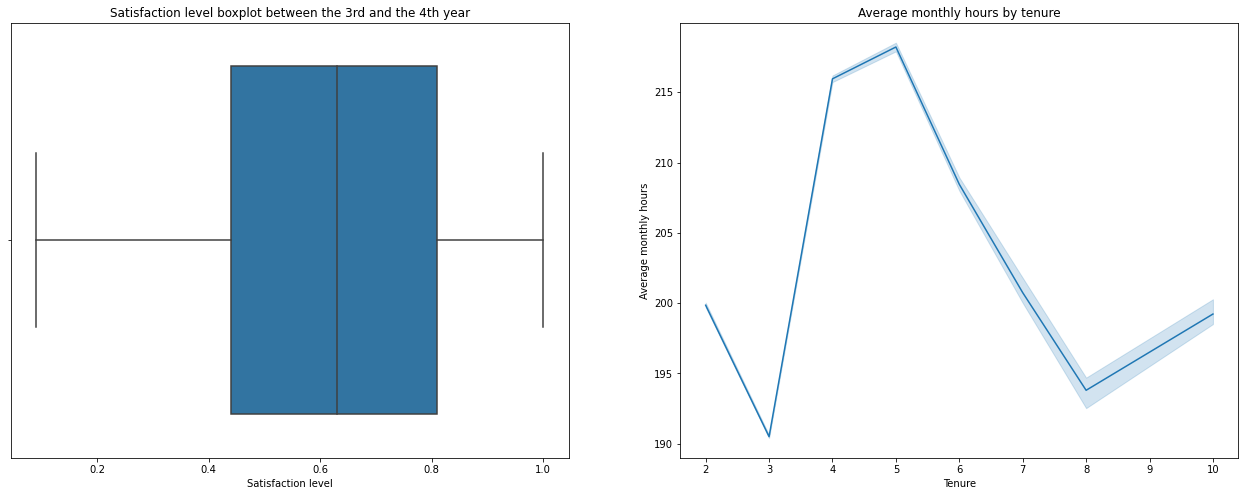

In [216]:
fig, ax = plt.subplots(1,2, figsize = (22,8))
ax[0] = sns.boxplot(data=df,x=df[df['tenure'].between(3,4)]['satisfaction_level'],ax=ax[0])
ax[0].set_title("Satisfaction level boxplot between the 3rd and the 4th year")
ax[0].set_xlabel("Satisfaction level")
ax[1] = sns.lineplot(data=df,x=df['tenure'],y=df['average_monthly_hours'],ax=ax[1],ci=15)
ax[1].set_title("Average monthly hours by tenure")
ax[1].set_ylabel("Average monthly hours")
ax[1].set_xlabel("Tenure")

plt.show()

In [204]:
# Display counts for each department
df["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Text(0.5, 20.80000000000002, 'Count of employees per department')

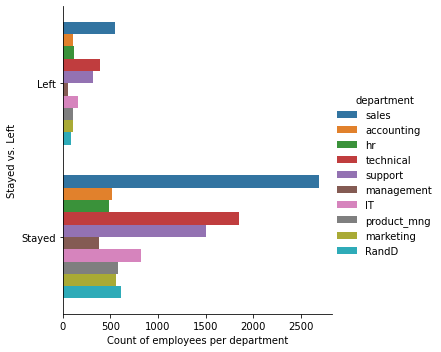

In [215]:
df['left_new'] = df['left'].map({1:'Left',0:'Stayed'})
dep_left = sns.catplot(data=df,y="left_new", hue="department", kind="count",palette="tab10")
plt.ylabel("Stayed vs. Left")
plt.xlabel("Count of employees per department")

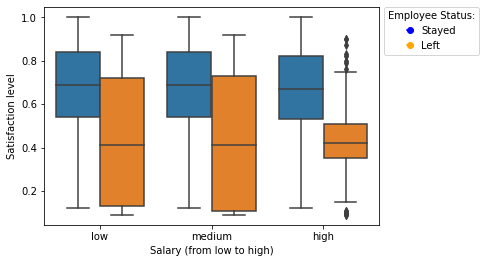

In [214]:
default_palette = sns.color_palette()
new_order = [handles[1], handles[0]]
dep_salary_plot = sns.boxplot(data=df, x="salary",y="satisfaction_level", hue="left",palette={0: default_palette[0], 1: default_palette[1]})
dep_salary_plot.legend(title='Employee Status:',loc='upper left',labels=["Stayed","Left"],handlelength=0.6,bbox_to_anchor=(1,1.025),handles=new_order)
plt.ylabel("Satisfaction level")
plt.xlabel("Salary (from low to high)")
# Show the plot
plt.show()

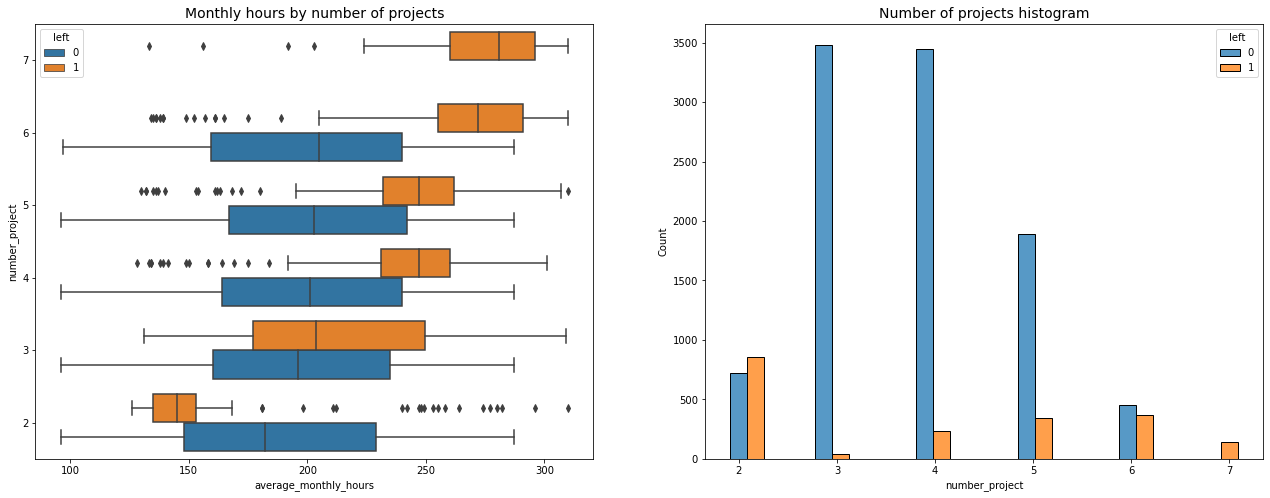

In [212]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')
tenure_stay = df[df['left']==0]['number_project']
tenure_left = df[df['left']==1]['number_project']
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')
plt.show()

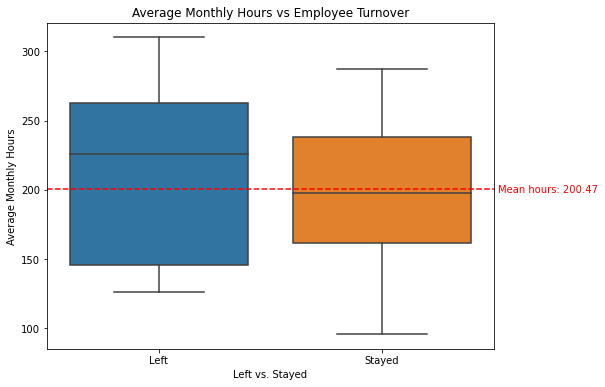

In [213]:
mean_hours = df['average_monthly_hours'].mean()
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='left_new', y='average_monthly_hours')
plt.axhline(y=mean_hours,color='r',linestyle="--",label=mean_hours)
plt.text(1.52, mean_hours, f'Mean hours: {mean_hours:.2f}', color='red', va='center')
plt.title('Average Monthly Hours vs Employee Turnover')
plt.xlabel('Left vs. Stayed')
plt.ylabel('Average Monthly Hours')
plt.show()

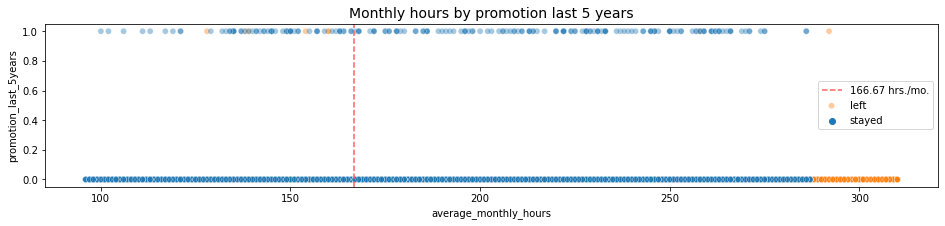

In [210]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');


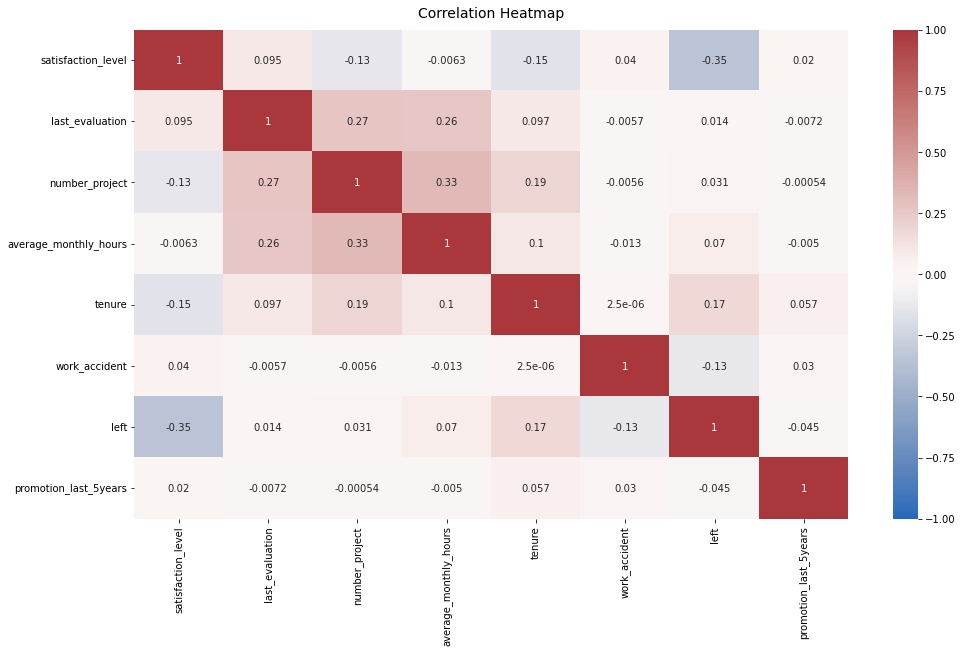

In [217]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

Insights:
- Satisfaction levels are connected usually to turnover rates,  but not always. For example, 3rd year had a high turn-over rate due to low satisfaction levels and a sharp incline in average working hours in the office. Although, there were satsified (0.75-0.8 on the satisfaction level) workers who worked during the 5th and 6th year that left. that might need to be investigated further. 
- Most of the leavers of the company had higher average working hours than the total mean over the year. That could point out that when employees are working over-time or more than 200 hours a month, they have a higher chance of leaving the company.
- There isn't seem to be a specific high turnover for a certain department in the company, so the department doesn't seem like an element to consider as a reason for the turnover.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

My goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves binary classification. (1 - left 0 - stayed).

### Identify the types of models most appropriate for this task.

Since the variable I want to predict (whether an employee leaves the company) is categorical, I could either build a Logistic Regression model, or a Tree-based Machine Learning model.

I decided on a Logistic Regression model.

### Modeling

Add as many cells as you need to conduct the modeling process.

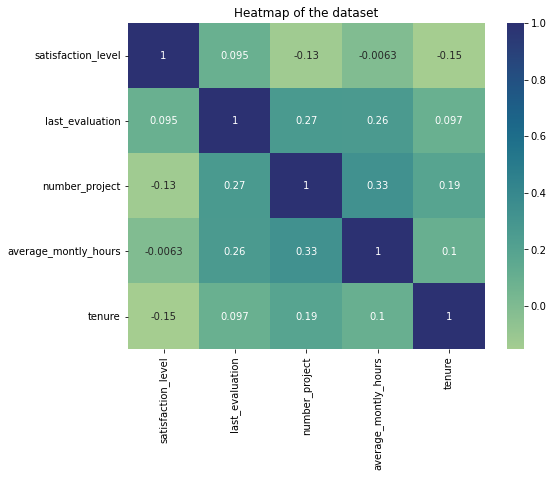

In [99]:
df_encoding = df.copy()
#cat.coding would get the different salary groups (low,medium and high) in the same
#column but as a different digit (0,1,2) accordiingly
df_encoding['salary'] = (df_encoding['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)
df_encoding = pd.get_dummies(data=df_encoding,drop_first=False)
df_encoding.head(10)
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoding[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Creating a stacked bar plot to visualize number of employees across department, comparing those who left with those who didn't.

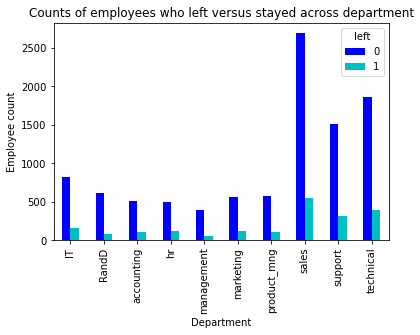

In [169]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (blue color) represents employees who did not leave, 1 (cyan color) represents employees who left
pd.crosstab(df['department'], df['left']).plot(kind ='bar',color='bc')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Since logistic regression is quite sensitive to outliers, I will remove the outliers in the tenure column that were identified earlier.

In [173]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_encoding[(df_encoding['tenure'] >= lower_limit) & (df_encoding['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,left_new_Left,left_new_Stayed
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


Isolating the outcome variable, which is the variable I want my model to predict.

In [176]:
y = df_logreg['left']

y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Selecting the features I want to use in the model. 

In [179]:
X = df_logreg.drop(columns=['left','left_new_Left','left_new_Stayed'],axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25,stratify=y)

Constructing a logistic regression model and fitting it to the training dataset.

In [183]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Testing the logistic regression model: using the model to make predictions on the test set.

In [185]:
y_pred = log_clf.predict(X_test)

Creating a confusion matrix to visualize the results of the logistic regression model.

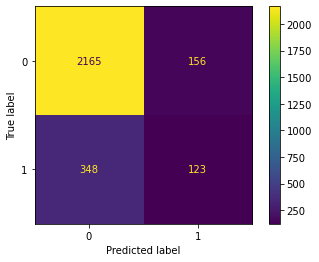

In [192]:
cm = confusion_matrix(y_test,y_pred,labels=log_clf.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=log_clf.classes_)
disp.plot(values_format='.0f')
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



Confusion matrix interpetation:

The confusion matrix shows a lot of true negatives, and a few true positives. That means that the model is good at predicting people who will stay in the company, but less good at predicting who will leave the company.It also show low numbers for false positives (people who did not leave the company but the model predicted them to leave) and for false negatives (people who left the company and the model predicted that they will stay).

In [194]:
df_logreg['left'].value_counts(normalize=True)*100

0    83.146772
1    16.853228
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, I might have resampled the data to make it more balanced. In this case though, I can use this data without modifying the class balance and continue evaluating the model.

In [196]:
# Creating a classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

For another project, I could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.